# Comparing measures vs readings: Plate 1
* We compare our GFP and ABS measures versus plate reader in '2023-06-06_16/11/54 PROVA'.
* Orange = our measure.
* Blue = plate reader.
* Linear rescaling applied to fit the max/min of our data with the max/min of the plate reader.
* *Deviation measure* is computed: 
$$
Deviation Measure = \frac{OurMeasure - PlateReader}{PlateReader}
$$

In [1]:
import cv2 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageproc import get_pocillos, complete_the_grid, draw_circles, array_from_pic, circle_crop

In [2]:
def compare_measures(measures_array, readings):
    # Linear scaling to fit max/min range of the readings
    x, a, b = measures_array, readings.min(), readings.max()
    x_norm = (x - x.min()) * (b - a) / (x.max() - x.min()) + a

    # Plot results row by row
    for i in range(len(measures_array)):   
        #print("Row ", i+1)
        plt.figure(figsize=(6, 3))
        plt.plot(np.arange(1,len(measures_array[0])+1), x_norm[i,:], "orange")
        plt.plot(np.arange(1,len(measures_array[0])+1), readings[i,:])
        plt.grid(linewidth=0.5, alpha=0.5)
        plt.title("Row "+str(i+1))
        plt.xticks([])
        plt.show()

    # Print metrics
    print("Deviation of a ", round(np.mean(x_norm - readings)/np.mean(readings)*100, 2), "%" )


## Fluorescència

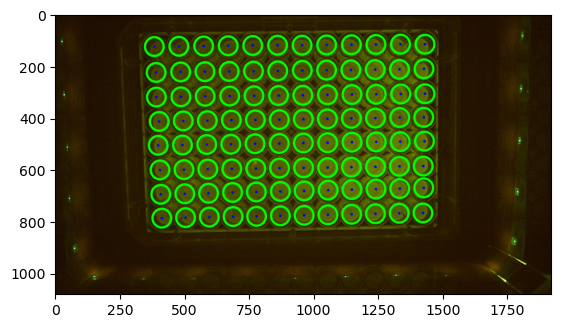

In [3]:
# Import image and detect circles
cam1 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/Picture_Res___2023-06-06_16:14:42_P1_Cam1.jpg'
img = cv2.imread(cam1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

# Get our measure
q_output_array = np.zeros((8,12))
grid_positions = new_circles[:,3:5]

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(img, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,1]
    q_output_array[position[0], position[1]] = np.percentile(cropped_pocillo[cropped_pocillo != 0], 90)  

# Get readings
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/GFP CT.xlsx').iloc[23:31,2:14].values.astype(int)


#### Grabbing **All** pocillos

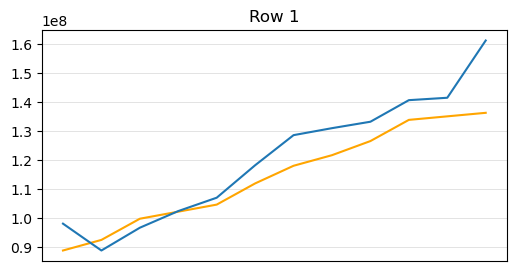

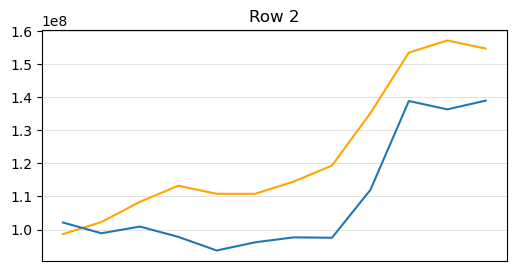

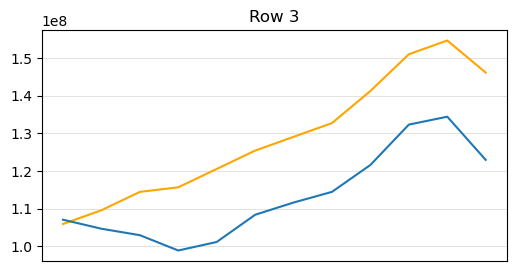

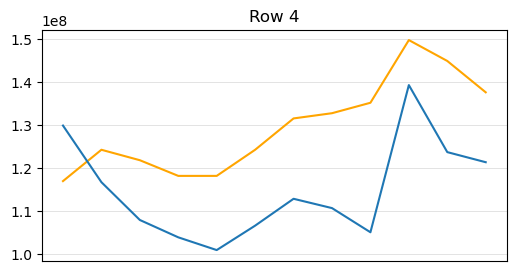

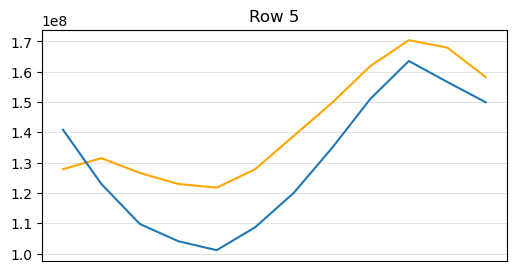

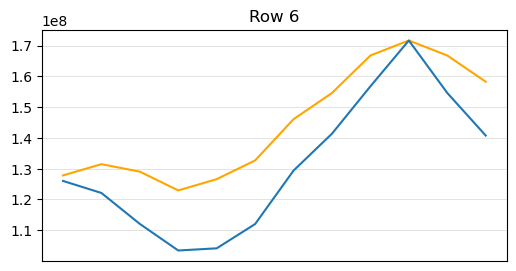

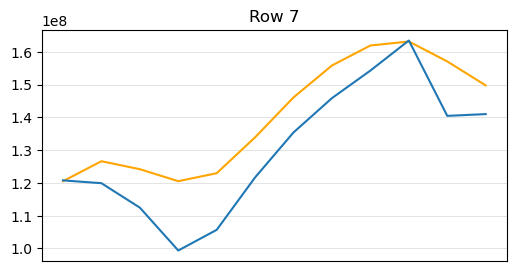

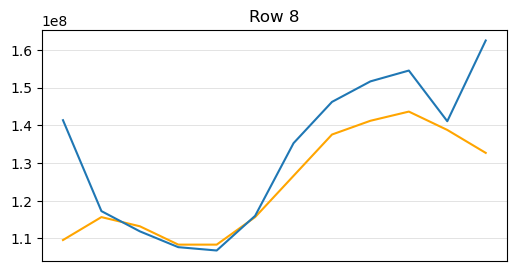

Deviation of a  6.6 %


In [4]:
compare_measures(q_output_array, readings)

#### Getting **rid** of first and last columns

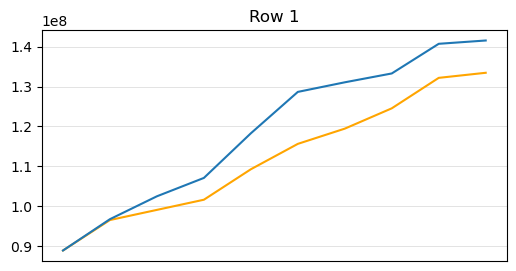

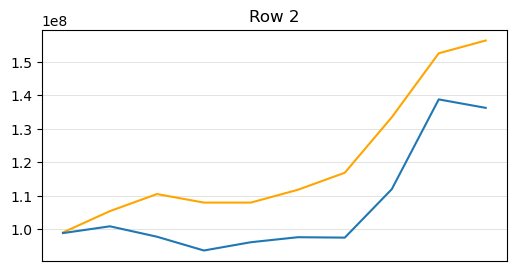

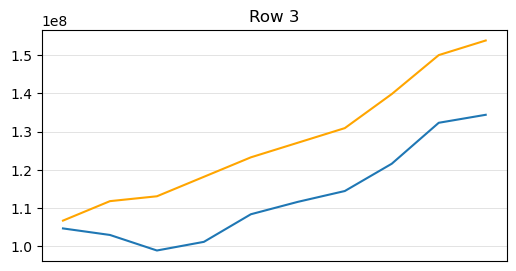

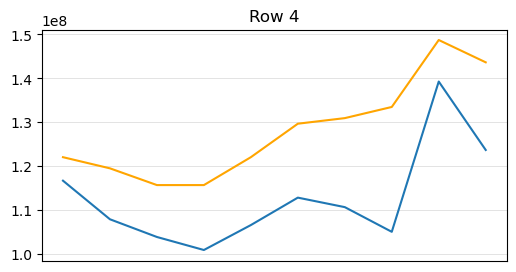

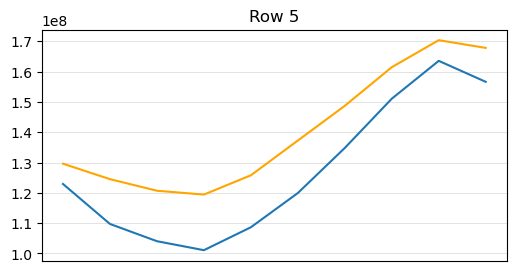

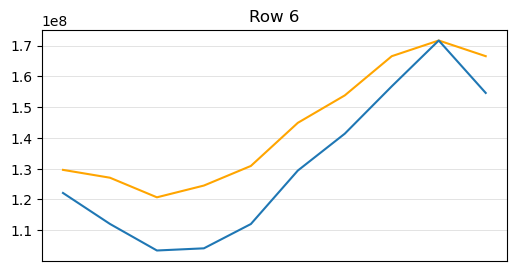

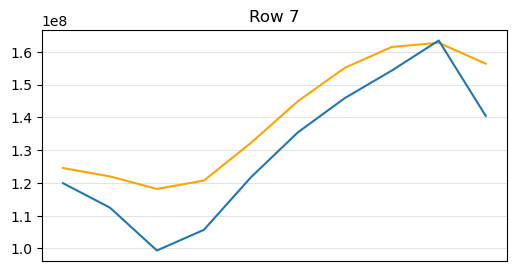

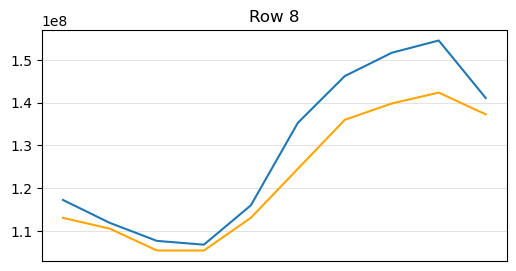

Deviation of a  6.85 %


In [5]:
compare_measures(q_output_array[:, 1:-1], readings[:, 1:-1])

## Densitat òptica

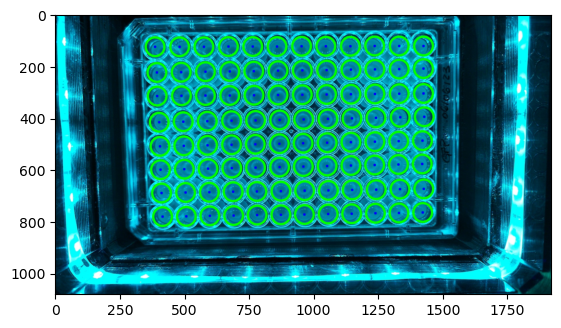

In [6]:
# Import image and detect circles
cam2 = '/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/Picture_Res___2023-06-06_16:14:42_P1_Cam2.jpg'
img = cv2.imread(cam2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = get_pocillos(img_bw)
new_circles = complete_the_grid(circles)
draw_circles(img, new_circles)

# Get our measure
mean_output_array = np.zeros((8,12))
grid_positions = new_circles[:,3:5]

for i, position in enumerate(grid_positions):
    cropped_pocillo = circle_crop(img, new_circles[i,0:3])
    cropped_pocillo = cropped_pocillo[:,:,2]
    mean_output_array[position[0], position[1]] = np.mean(cropped_pocillo[cropped_pocillo != 0])  

# Get readings
readings = pd.read_excel('/Users/guillemcobos/Library/CloudStorage/GoogleDrive-guillem.cobos@koabiotech.com/.shortcut-targets-by-id/1UQ_YnLRmoAqhCue-qXYNP9QhYorsiAxS/KOA Biotech/01. AUTOMATA LAB/EXPERIMENTS/2023-06-06_16:11:54 PROVA/PLATE1/GFP CT.xlsx').iloc[2:10,2:14].values.astype(float)


#### Grabbing **All** pocillos

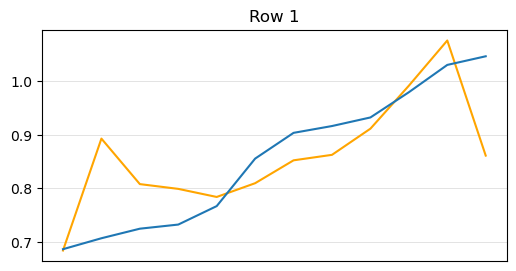

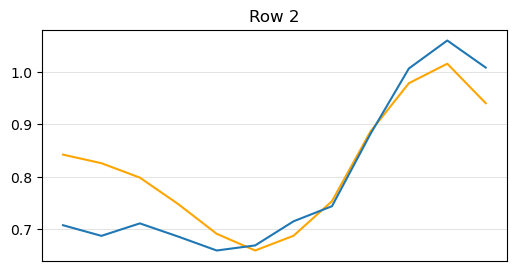

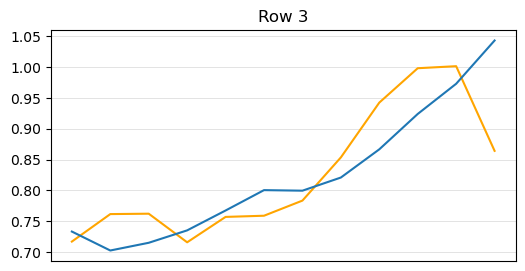

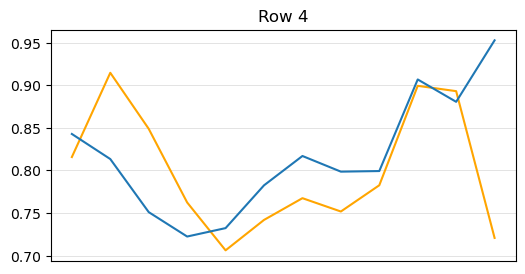

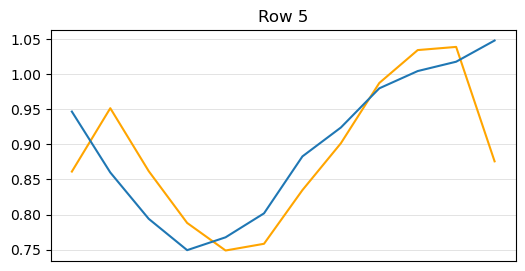

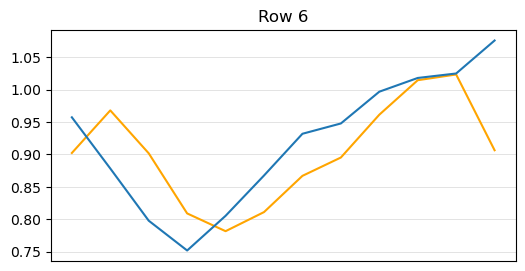

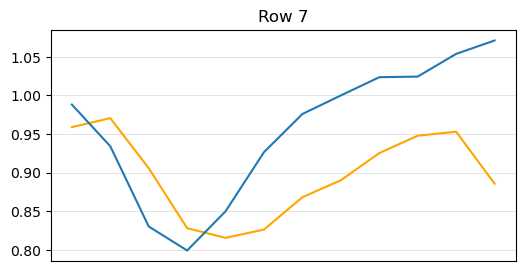

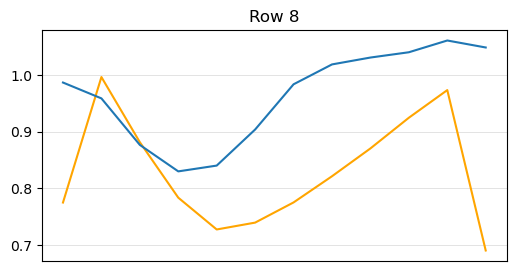

Deviation of a  -2.94 %


In [7]:
compare_measures(mean_output_array, readings)

#### Getting **rid** of first and last columns

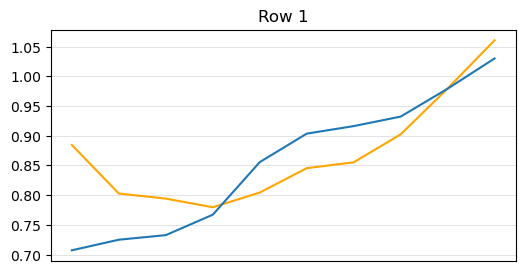

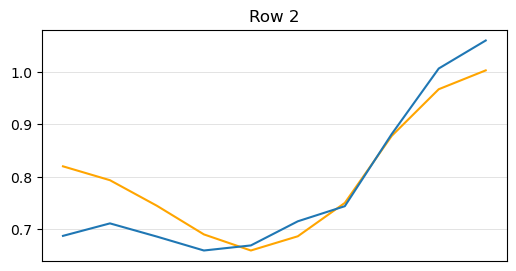

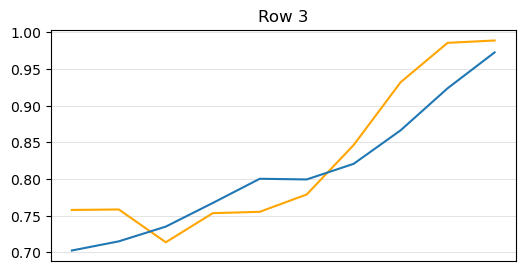

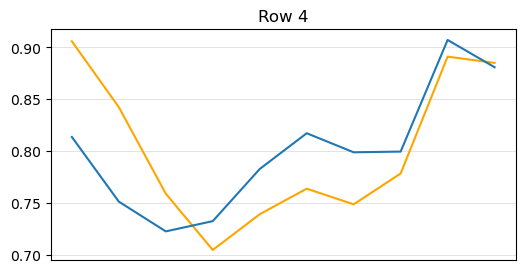

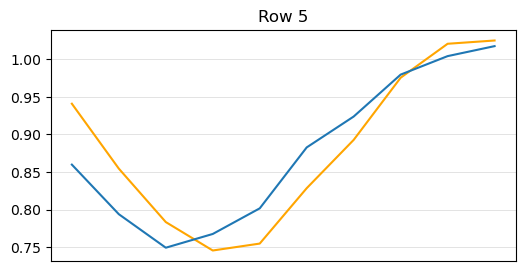

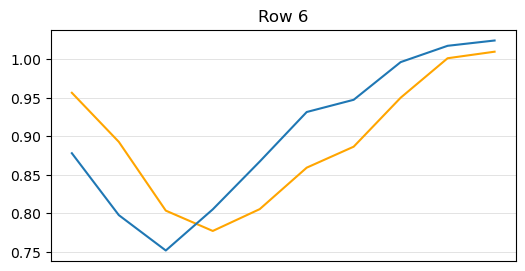

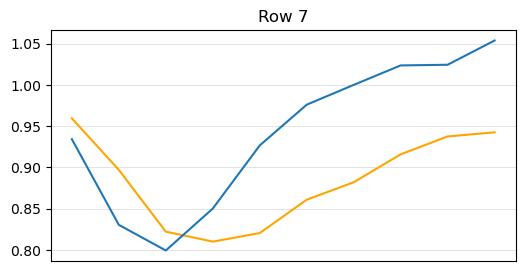

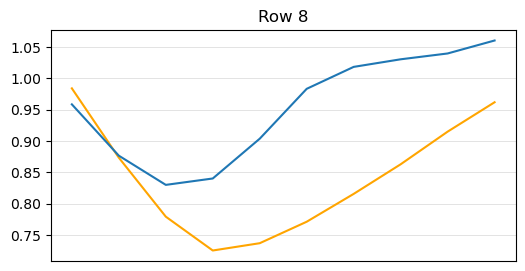

Deviation of a  -1.74 %


In [8]:
compare_measures(mean_output_array[:, 1:-1], readings[:, 1:-1])